In [1]:
import gc
import os
import numpy as np
import pandas as pd
import subprocess
# import seaborn as sns
# import matplotlib.pyplot as plt

df_train_transac = pd.read_csv('train_transaction.csv')

In [2]:
X = np.array(df_train_transac[['card1', 'card2', 'card3', 'card4', 'card5','card6']])
y = np.array(df_train_transac['isFraud'])

In [5]:
from sklearn import preprocessing
# min_max_scaler = preprocessing.MinMaxScaler()
# X_scaler=min_max_scaler.fit_transform(X, y)
X.shape

(590540, 6)

In [2]:
def count_feature_type(df):
    return df.dtypes.value_counts()


In [3]:
print(count_feature_type(df_train_transac))

float64    385
object       5
int64        5
dtype: int64


In [4]:
def check_missing(df,cols=None,axis=0):
    """check data frame column missing situation
    Args
    df: data frame.
    cols: list. List of column names
    axis: int. 0 means column and 1 means row
    
    Returns
    missing_info: data frame. 
    """
    if cols != None:
        df = df[cols]
    missing_num = df.isnull().sum(axis).to_frame().rename(columns={0:'missing_num'})
    missing_num['missing_percent'] = df.isnull().mean(axis)*100
    return missing_num.sort_values(by='missing_percent',ascending = False) 

In [5]:
df_colmissing = check_missing(df_train_transac,cols=None,axis=0)
df_colmissing.head()

,missing_num,missing_percent
dist2,552913,93.628374
D7,551623,93.409930
D13,528588,89.509263
D14,528353,89.469469
D12,525823,89.041047


In [6]:
df_colmissing_isFraud = check_missing(df_train_transac[df_train_transac['isFraud'] == 1],cols=None,axis=0)

In [7]:
# df_colmissing_isFraud.head(70)

In [8]:
df_colmissing_notFraud = check_missing(df_train_transac[df_train_transac['isFraud'] == 0],cols=None,axis=0)
# df_colmissing_notFraud.head(60)

In [9]:
df_x = df_train_transac.iloc[:,3:]

In [10]:
df_x

,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,86400,68.50,W,13926,NaN,150.0,discover,142.0,credit,315.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,86401,29.00,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,86469,59.00,W,4663,490.0,150.0,visa,166.0,debit,330.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,86499,50.00,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,86506,50.00,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,15811047,49.00,W,6550,NaN,150.0,visa,226.0,debit,272.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590536,15811049,39.50,W,10444,225.0,150.0,mastercard,224.0,debit,204.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590537,15811079,30.95,W,12037,595.0,150.0,mastercard,224.0,debit,231.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590538,15811088,117.00,W,7826,481.0,150.0,mastercard,224.0,debit,387.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
y = df_train_transac.iloc[:,2]

In [12]:
y

0         0
1         0
2         0
3         0
4         0
         ..
590535    0
590536    0
590537    0
590538    0
590539    0
Name: isFraud, Length: 590540, dtype: int64

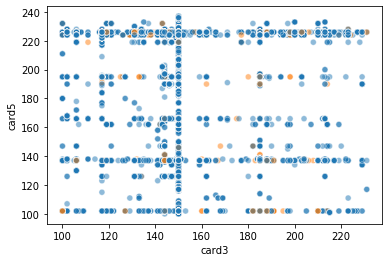

In [13]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
sns.scatterplot(df_x.card3, df_x.card5, y, alpha=.5, legend=False)

In [14]:
df_train_transac.describe()

,Unnamed: 0,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
count,590540.000000,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,581607.000000,588975.000000,586281.000000,524834.000000,...,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000
mean,295269.500000,3.282270e+06,0.034990,7.372311e+06,135.027682,9898.734658,362.555488,153.194925,199.278897,290.733794,...,0.775874,721.741883,1375.783644,1014.622782,9.807124,59.153343,28.531012,55.352422,151.160542,100.700882
std,170474.358321,1.704744e+05,0.183755,4.617224e+06,239.158822,4901.170153,157.793246,11.336444,41.244453,101.741072,...,4.727971,6217.223583,11169.275702,7955.735482,243.908569,387.597429,274.619002,668.486833,1095.034387,814.946722
min,0.000000,2.987000e+06,0.000000,8.640000e+04,0.251000,1000.000000,100.000000,100.000000,100.000000,100.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,147634.750000,3.134635e+06,0.000000,3.027058e+06,43.300000,6019.000000,214.000000,150.000000,166.000000,204.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,295269.500000,3.282270e+06,0.000000,7.306528e+06,68.750000,9678.000000,361.000000,150.000000,226.000000,299.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,442904.250000,3.429904e+06,0.000000,1.124662e+07,125.000000,14184.000000,512.000000,150.000000,226.000000,330.000000,...,0.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,590539.000000,3.577539e+06,1.000000,1.581113e+07,31940.000000,18396.000000,600.000000,231.000000,237.000000,540.000000,...,55.000000,160000.000000,160000.000000,160000.000000,55140.000000,55140.000000,55140.000000,104060.000000,104060.000000,104060.000000


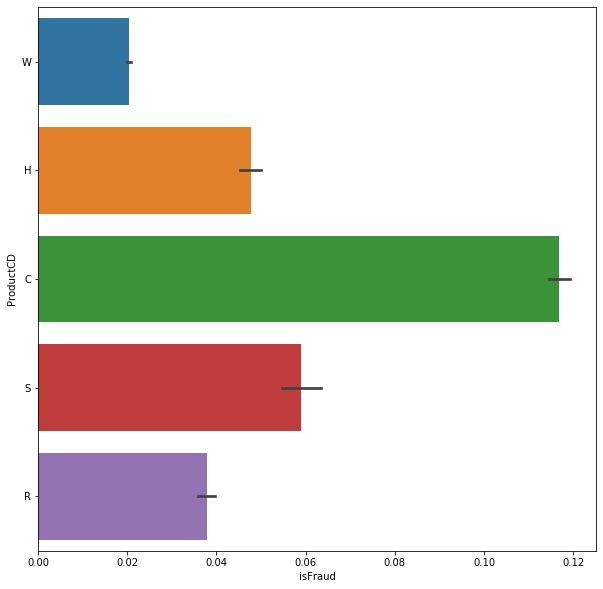

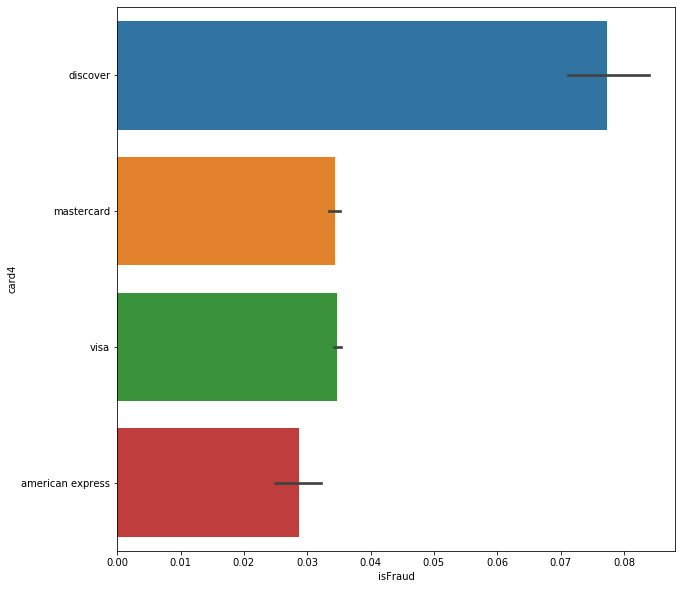

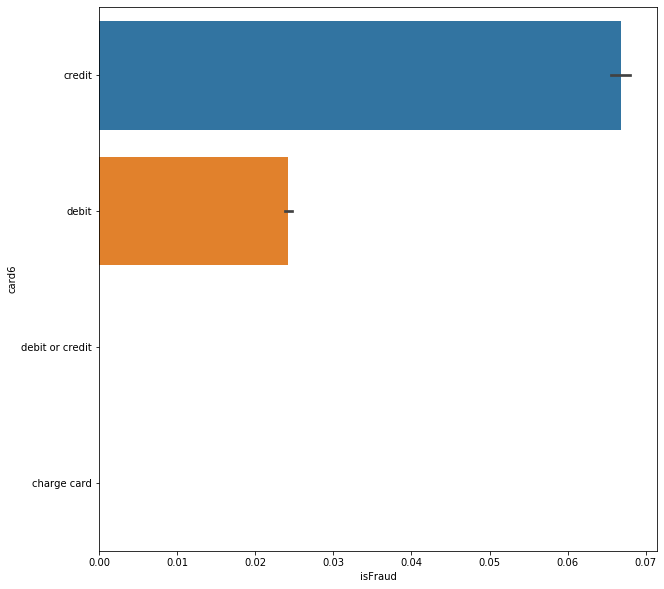

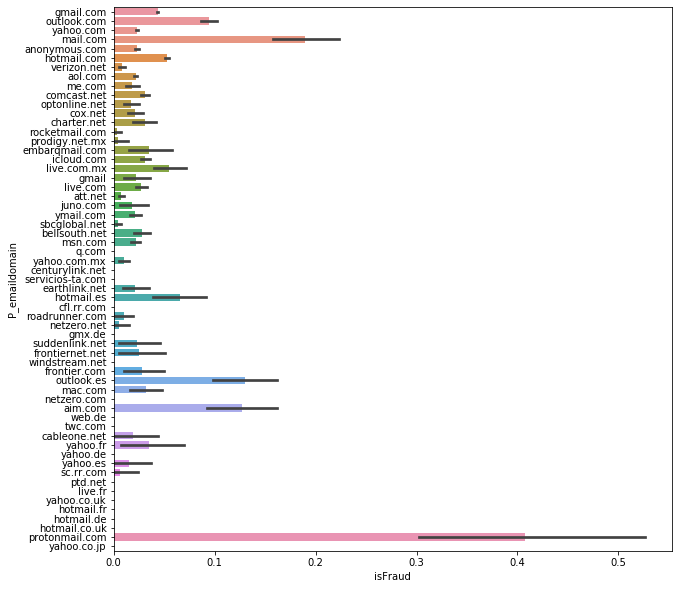

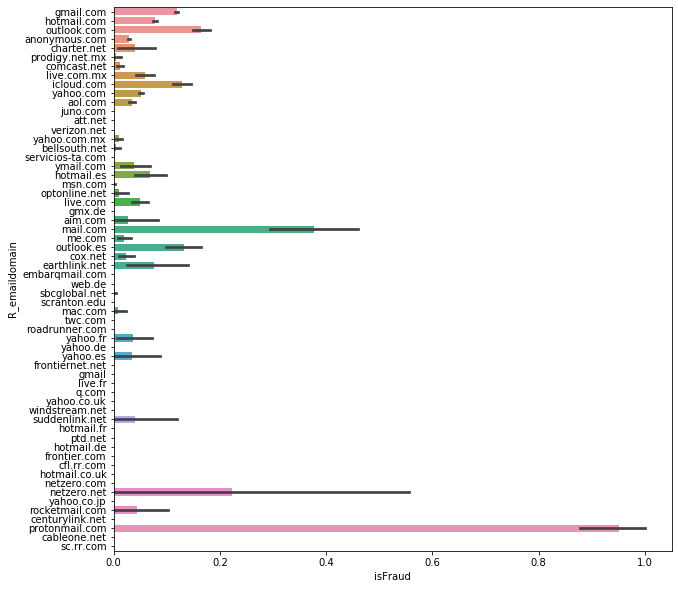

In [15]:
categorical = [col for col in df_train_transac.columns if df_train_transac[col].dtypes == 'object']
ct = df_train_transac[categorical].nunique().sort_values()
for col in categorical:
    plt.figure(figsize = [10,10])
    sns.barplot(y = df_train_transac[col], x = df_train_transac['isFraud'])

In [16]:
# 特征编码
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
count = 0
for col in categorical:
    if len(df_train_transac[col].unique()) == 2:
        count += 1
        lb.fit(df_train_transac[col])
        df_train_transac['o' + col] = lb.transform(df_train_transac[col])

In [17]:
df_train_transac = pd.get_dummies(df_train_transac)
print(df_train_transac.shape)

(590540, 522)


In [18]:
df_train_transac.describe()

,Unnamed: 0,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,...,R_emaildomain_web.de,R_emaildomain_windstream.net,R_emaildomain_yahoo.co.jp,R_emaildomain_yahoo.co.uk,R_emaildomain_yahoo.com,R_emaildomain_yahoo.com.mx,R_emaildomain_yahoo.de,R_emaildomain_yahoo.es,R_emaildomain_yahoo.fr,R_emaildomain_ymail.com
count,590540.000000,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,581607.000000,588975.000000,586281.000000,524834.000000,...,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000,590540.000000
mean,295269.500000,3.282270e+06,0.034990,7.372311e+06,135.027682,9898.734658,362.555488,153.194925,199.278897,290.733794,...,0.000401,0.000080,0.000056,0.000066,0.020053,0.002554,0.000127,0.000097,0.000232,0.000351
std,170474.358321,1.704744e+05,0.183755,4.617224e+06,239.158822,4901.170153,157.793246,11.336444,41.244453,101.741072,...,0.020029,0.008921,0.007475,0.008126,0.140181,0.050469,0.011269,0.009824,0.015229,0.018719
min,0.000000,2.987000e+06,0.000000,8.640000e+04,0.251000,1000.000000,100.000000,100.000000,100.000000,100.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,147634.750000,3.134635e+06,0.000000,3.027058e+06,43.300000,6019.000000,214.000000,150.000000,166.000000,204.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,295269.500000,3.282270e+06,0.000000,7.306528e+06,68.750000,9678.000000,361.000000,150.000000,226.000000,299.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,442904.250000,3.429904e+06,0.000000,1.124662e+07,125.000000,14184.000000,512.000000,150.000000,226.000000,330.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,590539.000000,3.577539e+06,1.000000,1.581113e+07,31940.000000,18396.000000,600.000000,231.000000,237.000000,540.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
import math
# train.describe()
def f(x):
#     x = '%.2f'%x
    return  1 / (1 + math.exp(-x))
df_train_transac.dtypes
df_train_transac[['TransactionAmt']] = df_train_transac[['TransactionAmt']].astype(float)
# df_train_transac[[ 'TransactionAmt']].apply(f)
df_train_transac[[ 'TransactionAmt' ,'dist1', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8','C9', 'C10', 'C11', 'C12', 'C13', 'C14']].applymap(f)

,TransactionAmt,dist1,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14
0,1.0,1.000000,0.731059,0.731059,0.5,0.5,0.500000,0.731059,0.5,0.500000,0.731059,0.500000,0.880797,0.500000,0.731059,0.731059
1,1.0,NaN,0.731059,0.731059,0.5,0.5,0.500000,0.731059,0.5,0.500000,0.500000,0.500000,0.731059,0.500000,0.731059,0.731059
2,1.0,1.000000,0.731059,0.731059,0.5,0.5,0.500000,0.731059,0.5,0.500000,0.731059,0.500000,0.731059,0.500000,0.731059,0.731059
3,1.0,NaN,0.880797,0.993307,0.5,0.5,0.500000,0.982014,0.5,0.500000,0.731059,0.500000,0.731059,0.500000,1.000000,0.731059
4,1.0,NaN,0.731059,0.731059,0.5,0.5,0.500000,0.731059,0.5,0.731059,0.500000,0.731059,0.731059,0.500000,0.731059,0.731059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
590535,1.0,1.000000,0.880797,0.731059,0.5,0.5,0.731059,0.500000,0.5,0.500000,0.880797,0.500000,0.731059,0.500000,0.952574,0.880797
590536,1.0,NaN,0.731059,0.731059,0.5,0.5,0.500000,0.731059,0.5,0.500000,0.731059,0.500000,0.731059,0.500000,0.731059,0.731059
590537,1.0,NaN,0.731059,0.731059,0.5,0.5,0.731059,0.731059,0.5,0.500000,0.731059,0.500000,0.731059,0.500000,0.731059,0.731059
590538,1.0,0.952574,0.731059,0.731059,0.5,0.5,0.500000,0.952574,0.5,0.500000,0.880797,0.500000,0.731059,0.731059,0.993307,0.731059


In [32]:
# 缺失值填充
from sklearn.preprocessing import Imputer, MinMaxScaler
imputer = Imputer(strategy = 'median')
# scaler = MinMaxScaler(feature_range = [0, 1])
train = df_train_transac.drop(columns = ['isFraud'])

imputer.fit(train)
train = imputer.transform(train)
# scaler.fit(train)
# train = scaler.transform(train)
print(train.shape)

/home/liumeng/.conda/envs/kaggle/lib/python3.6/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


(590540, 521)


In [33]:
print(train)

[[0.0000000e+00 2.9870000e+06 8.6400000e+04 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [1.0000000e+00 2.9870010e+06 8.6401000e+04 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [2.0000000e+00 2.9870020e+06 8.6469000e+04 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [5.9053700e+05 3.5775370e+06 1.5811079e+07 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [5.9053800e+05 3.5775380e+06 1.5811088e+07 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [5.9053900e+05 3.5775390e+06 1.5811131e+07 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]]


In [34]:
np.savetxt('new.csv', train, delimiter=',')

In [35]:
train_labels = df_train_transac['isFraud']

In [36]:
x_feature = list(df_train_transac.columns)
x_feature.remove('isFraud')
names = df_train_transac[x_feature].columns

In [40]:
# 重要特征排序
from sklearn.ensemble import RandomForestClassifier
clf  = RandomForestClassifier(n_estimators = 10, random_state = 123)
clf.fit(train, train_labels)
for feature in zip(names, clf.feature_importances_):
    print(feature)

('Unnamed: 0', 0.03030557952998939)
('TransactionID', 0.030323841542597728)
('TransactionDT', 0.02991350638626105)
('TransactionAmt', 0.02616217267544809)
('card1', 0.023907152589274807)
('card2', 0.021162700783889984)
('card3', 0.004142024978859671)
('card5', 0.011155812598970452)
('addr1', 0.01734266379099756)
('addr2', 0.0008183304537630714)
('dist1', 0.008020018668092866)
('dist2', 0.003719701104658867)
('C1', 0.015563350669872793)
('C2', 0.009597997513772832)
('C3', 3.3448047486691665e-05)
('C4', 0.008971685842456346)
('C5', 0.0020773282239863874)
('C6', 0.008035765735149114)
('C7', 0.005039195699713704)
('C8', 0.0067281507011676634)
('C9', 0.004933727508818623)
('C10', 0.0037442911558287512)
('C11', 0.011478378782001872)
('C12', 0.008784141882179453)
('C13', 0.017058915375650515)
('C14', 0.012909758434393688)
('D1', 0.008164302276887588)
('D2', 0.008663510479036888)
('D3', 0.004935262393048279)
('D4', 0.008239247824272192)
('D5', 0.005588163391679524)
('D6', 0.002033133578276982)